In [1]:
import yfinance as yf
import pandas as pd
import csv
from tqdm import tqdm
import html5lib
from scipy.stats import norm
import numpy as np

In [2]:
with open('sp500.csv', newline='') as f:
    reader = csv.reader(f)
    sp500 = [val for sublist in list(reader) for val in sublist]

sp500.remove('GOOGL')
sp500.append('GOOG')
sp500[:5]

['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN']

In [7]:
stocks_sectors = {}
errors = []

for stock in tqdm(sp500):
    try:
        stocks_sectors[stock] = [yf.Ticker(stock).info['sector'], yf.Ticker(stock).info['shortName']]
    except Exception as e:
        errors.append([e, stock])

100%|██████████| 505/505 [23:39<00:00,  2.81s/it]


In [17]:
stocks_NA = {}
for s in errors:
    stocks_NA[s[1]] = ['No Information', 'No Information']

In [18]:
all_stocks = {**stocks_sectors, ** stocks_NA}

In [19]:
all_stocks = sorted(all_stocks.items())

In [45]:
clean_all_stocks = []

for i in range(len(all_stocks)):
    clean_all_stocks.append([all_stocks[i][0],
                            all_stocks[i][1][0],
                            all_stocks[i][1][1]])

In [47]:
import csv
f = open('sp500_sectors.csv', 'w')

with f:
    writer = csv.writer(f)
    for row in clean_all_stocks:
        writer.writerow(row)

In [48]:
with open('sp500_sectors.csv', newline='') as f:
    reader = csv.reader(f)
    sp500_s = list(reader)

sp500_s[:5]

[['A', 'Healthcare', 'Agilent Technologies, Inc.'],
 ['AAL', 'Industrials', 'American Airlines Group, Inc.'],
 ['AAP', 'Consumer Cyclical', 'Advance Auto Parts Inc Advance '],
 ['AAPL', 'Technology', 'Apple Inc.'],
 ['ABBV', 'Healthcare', 'AbbVie Inc.']]

In [77]:
with open('sp500_sectors.csv', newline='') as f:
    reader = csv.reader(f)
    sp500_s = list(reader)

clean_sp500 = {
 'Basic Materials': [],
 'Communication Services': [],
 'Consumer Cyclical': [],
 'Consumer Defensive': [],
 'Energy': [],
 'Financial Services': [],
 'Healthcare': [],
 'Industrials': [],
 'Real Estate': [],
 'Technology': [],
 'Utilities': [],
 'No Information': []
}

for sector, value in clean_sp500.items():
    for row in sp500_s:
        if sector == row[1]:
            clean_sp500[row[1]] += [row[0], row[2]]

In [84]:
for i in range(len(clean_sp500['Utilities'])):
    if i % 2 == 0:
        print('symbol', clean_sp500['Utilities'][i])
    else:
        print('name', clean_sp500['Utilities'][i])

symbol AEE
name Ameren Corporation
symbol AEP
name American Electric Power Company
symbol AES
name The AES Corporation
symbol ATO
name Atmos Energy Corporation
symbol AWK
name American Water Works Company, I
symbol CMS
name CMS Energy Corporation
symbol CNP
name CenterPoint Energy, Inc (Holdin
symbol D
name Dominion Energy, Inc.
symbol DTE
name DTE Energy Company
symbol ED
name Consolidated Edison, Inc.
symbol EIX
name Edison International
symbol ES
name Eversource Energy (D/B/A)
symbol EXC
name Exelon Corporation
symbol LNT
name Alliant Energy Corporation
symbol NRG
name NRG Energy, Inc.
symbol SO
name Southern Company (The)
symbol SRE
name Sempra Energy


In [89]:
[{'label': clean_sp500['Utilities'][i], 'value': clean_sp500['Utilities'][i+1]} for i in range(len(clean_sp500['Utilities'])) if i % 2 ==0]

[{'label': 'AEE', 'value': 'Ameren Corporation'},
 {'label': 'AEP', 'value': 'American Electric Power Company'},
 {'label': 'AES', 'value': 'The AES Corporation'},
 {'label': 'ATO', 'value': 'Atmos Energy Corporation'},
 {'label': 'AWK', 'value': 'American Water Works Company, I'},
 {'label': 'CMS', 'value': 'CMS Energy Corporation'},
 {'label': 'CNP', 'value': 'CenterPoint Energy, Inc (Holdin'},
 {'label': 'D', 'value': 'Dominion Energy, Inc.'},
 {'label': 'DTE', 'value': 'DTE Energy Company'},
 {'label': 'ED', 'value': 'Consolidated Edison, Inc.'},
 {'label': 'EIX', 'value': 'Edison International'},
 {'label': 'ES', 'value': 'Eversource Energy (D/B/A)'},
 {'label': 'EXC', 'value': 'Exelon Corporation'},
 {'label': 'LNT', 'value': 'Alliant Energy Corporation'},
 {'label': 'NRG', 'value': 'NRG Energy, Inc.'},
 {'label': 'SO', 'value': 'Southern Company (The)'},
 {'label': 'SRE', 'value': 'Sempra Energy'}]

In [88]:
clean_sp500['Utilities'][33]

'Sempra Energy'

In [57]:
for i in clean_sp500['Utilities']:
    print(i)

AEE
Ameren Corporation
AEP
American Electric Power Company
AES
The AES Corporation
ATO
Atmos Energy Corporation
AWK
American Water Works Company, I
CMS
CMS Energy Corporation
CNP
CenterPoint Energy, Inc (Holdin
D
Dominion Energy, Inc.
DTE
DTE Energy Company
ED
Consolidated Edison, Inc.
EIX
Edison International
ES
Eversource Energy (D/B/A)
EXC
Exelon Corporation
LNT
Alliant Energy Corporation
NRG
NRG Energy, Inc.
SO
Southern Company (The)
SRE
Sempra Energy


In [5]:
selection = dict(zip(sectors, range(len(sectors))))
selection

{'Basic Materials': 0,
 'Communication Services': 1,
 'Consumer Cyclical': 2,
 'Consumer Defensive': 3,
 'Energy': 4,
 'Financial Services': 5,
 'Healthcare': 6,
 'Industrials': 7,
 'Real Estate': 8,
 'Technology': 9,
 'Utilities': 10}

In [6]:
for k in selection:
    print(k)

Basic Materials
Communication Services
Consumer Cyclical
Consumer Defensive
Energy
Financial Services
Healthcare
Industrials
Real Estate
Technology
Utilities


In [4]:
# get historical market data
hist = yf.Ticker('GOOG').history(period="2y")

In [5]:
hist.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,505.000000,505.000000,505.00000,505.000000,5.050000e+02,505.0,505.0
mean,1244.595584,1258.354653,1231.91895,1245.953465,1.684050e+06,0.0,0.0
std,153.885775,155.161124,153.80795,155.154345,7.552536e+05,0.0,0.0
min,973.900000,1003.540000,970.11000,976.220000,3.475000e+05,0.0,0.0
25%,1122.000000,1132.800000,1109.02000,1120.160000,1.221900e+06,0.0,0.0
50%,1200.740000,1212.020000,1193.08000,1204.800000,1.479900e+06,0.0,0.0
75%,1355.870000,1368.140000,1344.47000,1355.120000,1.888500e+06,0.0,0.0
max,1709.710000,1733.180000,1666.33000,1728.280000,6.207000e+06,0.0,0.0


In [6]:
# get stock info
print(yf.Ticker('GOOG').info)

{'zip': '94043', 'sector': 'Communication Services', 'fullTimeEmployees': 127498, 'longBusinessSummary': 'Alphabet Inc. provides online advertising services in the United States, Europe, the Middle East, Africa, the Asia-Pacific, Canada, and Latin America. It offers performance and brand advertising services. The company operates through Google and Other Bets segments. The Google segment offers products, such as Ads, Android, Chrome, Google Cloud, Google Maps, Google Play, Hardware, Search, and YouTube, as well as technical infrastructure. It also offers digital content, cloud services, hardware devices, and other miscellaneous products and services. The Other Bets segment includes businesses, including Access, Calico, CapitalG, GV, Verily, Waymo, and X, as well as Internet and television services. Alphabet Inc. was founded in 1998 and is headquartered in Mountain View, California.', 'city': 'Mountain View', 'phone': '650-253-0000', 'state': 'CA', 'country': 'United States', 'companyOf

<AxesSubplot:xlabel='Date'>

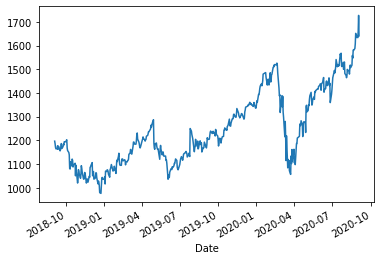

In [8]:
hist.Close.plot()

In [9]:
sp = yf.Ticker('^GSPC')
sp.info

{'previousClose': 3580.84,
 'regularMarketOpen': 3564.74,
 'twoHundredDayAverage': 3030.5415,
 'trailingAnnualDividendYield': None,
 'payoutRatio': None,
 'volume24Hr': None,
 'regularMarketDayHigh': 3564.85,
 'navPrice': None,
 'averageDailyVolume10Day': 4096046250,
 'totalAssets': None,
 'regularMarketPreviousClose': 3580.84,
 'fiftyDayAverage': 3352.7456,
 'trailingAnnualDividendRate': None,
 'open': 3564.74,
 'toCurrency': None,
 'averageVolume10days': 4096046250,
 'expireDate': None,
 'yield': None,
 'algorithm': None,
 'dividendRate': None,
 'exDividendDate': None,
 'beta': None,
 'circulatingSupply': None,
 'startDate': None,
 'regularMarketDayLow': 3427.41,
 'priceHint': 2,
 'currency': 'USD',
 'regularMarketVolume': 3193601820,
 'lastMarket': None,
 'maxSupply': None,
 'openInterest': None,
 'marketCap': None,
 'volumeAllCurrencies': None,
 'strikePrice': None,
 'averageVolume': 4770155384,
 'priceToSalesTrailing12Months': None,
 'dayLow': 3427.41,
 'ask': 3504.81,
 'ytdReturn

In [31]:
with open('sp500_sectors.csv', newline='') as f:
    reader = csv.reader(f)
    sp500_s = dict(reader)

In [33]:
sectors = [
 'Basic Materials',
 'Communication Services',
 'Consumer Cyclical',
 'Consumer Defensive',
 'Energy',
 'Financial Services',
 'Healthcare',
 'Industrials',
 'Real Estate',
 'Technology',
 'Utilities',
 'No Information'
]

In [39]:
clean_sp500 = {
 'Basic Materials': [],
 'Communication Services': [],
 'Consumer Cyclical': [],
 'Consumer Defensive': [],
 'Energy': [],
 'Financial Services': [],
 'Healthcare': [],
 'Industrials': [],
 'Real Estate': [],
 'Technology': [],
 'Utilities': [],
 'No Information': []
}

for sector, value in clean_sp500.items():
    for key, item in sp500_s.items():
        if sector == item:
            clean_sp500[sector] += [key]

In [2]:
df = yf.Ticker('GOOG').history('2y')
df['Returns'] = (df.Open - df.Open.shift(1)) / df.Open.shift(1)
df = df.iloc[1:]
df.reset_index(inplace=True)

In [12]:
mu, std = norm.fit(df.Returns)
xmin = df.Returns.min()
xmax = df.Returns.max()
x_line = np.linspace(xmin, xmax, 2)
p = norm.pdf(x_line)

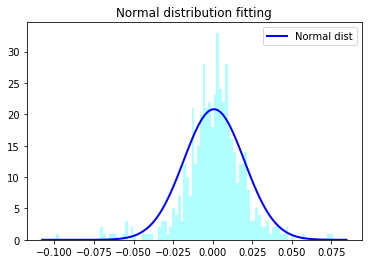

In [31]:
import matplotlib.pyplot as plt
plt.hist(df.Returns,color="cyan",alpha=.3, bins=100) #alpha, from 0 (transparent) to 1 (opaque)
# Type help(plot) for a ton of information on pyplot
xmin, xmax = plt.xlim()
x_line = np.linspace(xmin, xmax, 100)
p = norm.pdf(x_line, df.Returns.mean(), df.Returns.std())
plt.plot(x_line,p,"blue",label="Normal dist", linewidth=2)

plt.title("Normal distribution fitting")
# insert a legend in the plot (using label)
plt.legend()

# we finally show our work
plt.show()

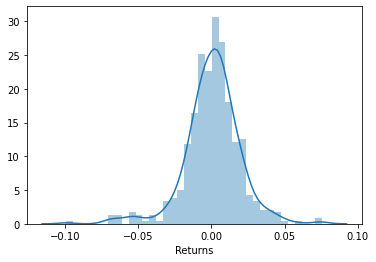

In [29]:
import seaborn as sns
sns.distplot(df.Returns)

In [127]:
df2 = yf.Ticker('CTVA').history('2y')
df2['Returns'] = df2.Close.pct_change()
df2 = df2.iloc[1:]
#df2.reset_index(inplace=True)

In [128]:
df2['Returns'].sort_values(ascending=True).quantile(0.05)

-0.04711586458672947

In [129]:
df2.Returns.mean() - np.mean(df2.Returns)

0.0

In [145]:
df2 = yf.Ticker('GOOG').history('2y')
df2['Returns'] = df2.Close.pct_change()
df2 = df2.iloc[1:]

In [147]:
df2[df2.index >= date_min]

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Returns
Date,,,,,,,,
2019-05-28,1134.00,1151.59,1133.12,1134.15,1365000,0,0,0.000600
2019-05-29,1127.52,1129.10,1108.22,1116.46,1538200,0,0,-0.015598
2019-05-30,1115.54,1123.13,1112.12,1117.95,951900,0,0,0.001335
2019-05-31,1101.29,1109.60,1100.18,1103.63,1507800,0,0,-0.012809
2019-06-03,1065.50,1065.50,1025.00,1036.23,5130600,0,0,-0.061071
...,...,...,...,...,...,...,...,...
2020-09-01,1636.63,1665.73,1632.22,1660.71,1826700,0,0,0.016234
2020-09-02,1673.78,1733.18,1666.33,1728.28,2511200,0,0,0.040687
2020-09-03,1709.71,1709.71,1615.06,1641.84,3107800,0,0,-0.050015


In [34]:
t = np.corrcoef([df.Returns, df2.Returns])

In [36]:
pd.DataFrame(t, columns=['GOOG', 'AMZN'], index=['GOOG', 'AMZN'])

,GOOG,AMZN
GOOG,1.00000,0.74978
AMZN,0.74978,1.00000


In [37]:
t = np.corrcoef([df.Returns])

In [160]:
ALL_STOCKS = {'TSLA': 'Tesla', 'GOOG': 'Google', 'AAPL': 'Apple', 'AMZN': 'Amazon'}

In [189]:
len(ALL_STOCKS)

4

In [163]:
dfs = {}
for stock, _ in ALL_STOCKS.items():
    dfs[stock] = yf.Ticker(stock).history(period="2y")
    dfs[stock]['Returns'] = dfs[stock].Close.pct_change()
    dfs[stock] = dfs[stock].iloc[1:]
    dfs[stock].reset_index(inplace=True)

date_min = max([dfs[stock].Date.min() for stock in dfs])
for df in dfs:
    dfs[df] = dfs[df][dfs[df].Date >= date_min]
    dfs[df].reset_index(inplace=True)
    dfs[df] = dfs[df].Close
    

full_returns = pd.concat([dfs[df] for df in dfs], axis=1)
full_returns.columns = [df for df in dfs]
full_returns

,TSLA,GOOG,AAPL,AMZN
0,55.89,1177.36,54.57,1987.15
1,58.11,1162.82,53.89,1990.00
2,57.89,1175.33,55.19,1989.87
3,59.04,1172.53,54.56,1970.19
4,58.97,1156.05,53.11,1908.03
...,...,...,...,...
497,475.05,1660.71,134.18,3499.12
498,447.37,1728.28,131.40,3531.45
499,407.00,1641.84,120.88,3368.00
500,418.32,1591.04,120.96,3294.62


In [164]:
log_ret = np.log(full_returns/full_returns.shift(1))
log_ret

,TSLA,GOOG,AAPL,AMZN
0,NaN,NaN,NaN,NaN
1,0.038952,-0.012427,-0.012539,0.001433
2,-0.003793,0.010701,0.023837,-0.000065
3,0.019671,-0.002385,-0.011481,-0.009939
4,-0.001186,-0.014155,-0.026936,-0.032059
...,...,...,...,...
497,-0.047822,0.016104,0.039060,0.013859
498,-0.060034,0.039881,-0.020936,0.009197
499,-0.094573,-0.051309,-0.083448,-0.047389
500,0.027434,-0.031430,0.000662,-0.022028


In [165]:
np.random.seed(42)
num_ports = 6000
all_weights = np.zeros((num_ports, len(full_returns.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for x in range(num_ports):
    # Weights
    weights = np.array(np.random.random(4))
    weights = weights/np.sum(weights)
    
    # Save weights
    all_weights[x,:] = weights
    
    # Expected return
    ret_arr[x] = np.sum( (log_ret.mean() * weights * 252))
    
    # Expected volatility
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252, weights)))
    
    # Sharpe Ratio
    sharpe_arr[x] = ret_arr[x]/vol_arr[x]

In [166]:
sharpe_arr.max()

1.3763125670935081

In [167]:
sharpe_arr.argmax()

3284

In [168]:
print(all_weights[sharpe_arr.argmax(),:])
max_sr_ret = ret_arr[sharpe_arr.argmax()]
max_sr_vol = vol_arr[sharpe_arr.argmax()]

[0.49514412 0.00226066 0.46748973 0.03510549]


In [171]:
import yfinance as yf
import pandas as pd
import csv
from tqdm.notebook import tqdm
import html5lib
import plotly.express as px
from datetime import datetime
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

In [188]:
fig = go.Figure(go.Scatter(
    x=vol_arr,
    y=ret_arr,
    marker=dict(
        size=5,
        color=sharpe_arr,
        colorbar=dict(
            title="Colorbar"
        ),
        colorscale="Viridis"
    ),
    mode="markers",
    name="Portfolios (6000)"))

fig.add_trace(go.Scatter(
    x=[max_sr_vol],
    y=[max_sr_ret],
    marker={'color':'red'},
    mode='markers',
    name='Efficient Portfolio'
))

fig.update_layout(legend=dict(
    yanchor="top",
    y=1.2,
    xanchor="left",
    x=0.01
))

fig.show()

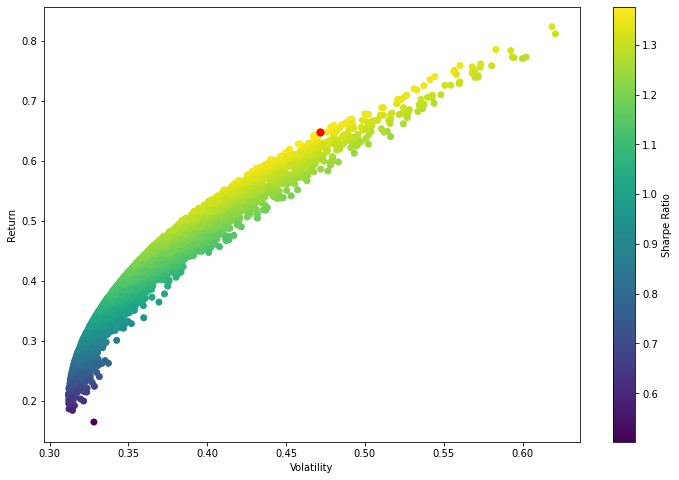

In [169]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(max_sr_vol, max_sr_ret,c='red', s=50) # red dot
plt.show()

In [75]:
from scipy.stats import linregress

stats = pd.DataFrame(
    {
        'Stock': [name for _, name in ALL_STOCKS.items()],
        'Std': [dfs[df].Returns.std() for df in dfs],
        'Annual Std': [dfs[df].Returns.std()* np.sqrt(252) for df in dfs],
        'Mean': [dfs[df].Returns.mean() for df in dfs],
        'Median': [np.median(dfs[df].Returns) for df in dfs],
        'Min': [dfs[df].Returns.min() for df in dfs],
        'Max': [dfs[df].Returns.max() for df in dfs],
        'Kurtosis': [dfs[df].Returns.kurtosis() for df in dfs],
        'Skewness': [dfs[df].Returns.skew() for df in dfs],
        'Alpha': [linregress(dfs[df].Returns, market.Returns).intercept for df in dfs],
        'Beta': [linregress(dfs[df].Returns, market.Returns).slope for df in dfs],
        'VaR 95% HS': [np.percentile(dfs[df].Returns, 0.05) for df in dfs],
        'VaR 95% DN': [norm.cdf(norm.ppf(0.95)) * dfs[df].Returns.std() for df in dfs],
        'Systemic Risk': [linregress(dfs[df].Returns, market.Returns).slope**2 * market.Returns.var() for df in dfs]
    },
    index=[df for _, df in ALL_STOCKS.items()]
).round(6)

In [76]:
stats.to_dict('records')

[{'Stock': 'S&P500',
  'Std': 0.012442,
  'Annual Std': 0.197518,
  'Mean': 0.00043,
  'Median': 0.001462,
  'Min': -0.06892,
  'Max': 0.0622,
  'Kurtosis': 5.453438,
  'Skewness': -0.614701,
  'Alpha': 0.0,
  'Beta': 1.0,
  'VaR 95% HS': -0.066192,
  'VaR 95% DN': 0.01182,
  'Systemic Risk': 0.000155},
 {'Stock': 'Google',
  'Std': 0.019157,
  'Annual Std': 0.304114,
  'Mean': 0.000796,
  'Median': 0.001717,
  'Min': -0.098984,
  'Max': 0.075776,
  'Kurtosis': 3.653706,
  'Skewness': -0.624357,
  'Alpha': 5.8e-05,
  'Beta': 0.468236,
  'VaR 95% HS': -0.091795,
  'VaR 95% DN': 0.018199,
  'Systemic Risk': 3.4e-05}]

In [12]:
ALL_STOCKS = {"^GSPC":'Google', 'AMZN': 'Apple'}

In [10]:
dfs = {}
for stock, _ in ALL_STOCKS.items():
    dfs[stock] = yf.Ticker(stock).history(period="2y")
    dfs[stock]['Returns'] = dfs[stock].Close.pct_change()
    dfs[stock] = dfs[stock].iloc[1:]
    dfs[stock].reset_index(inplace=True)

num_ports = 6000
date_min = max([dfs[stock].Date.min() for stock in dfs])
for df in dfs:
    dfs[df] = dfs[df][dfs[df].Date >= date_min]
    dfs[df].reset_index(inplace=True)


full_returns = pd.concat([dfs[df].Returns for df in dfs], axis=1)
full_returns.columns = [df for df in dfs]

full_close = pd.concat([dfs[df].Close for df in dfs], axis=1)
full_close.columns = [df for df in dfs]
log_ret = np.log(full_close/full_close.shift(1))

In [11]:
all_weights = np.zeros((num_ports, len(full_close.columns)))

for x in range(num_ports):
    # Weights
    weights = np.array(np.random.random(2)) # Problem here
    weights = weights/np.sum(weights)

    # Save weights
    all_weights[x,:] = weights

In [37]:
avg_rets

array([0., 0., 0., ..., 0., 0., 0.])

In [42]:
dfs = {}
for stock, _ in ALL_STOCKS.items():
    dfs[stock] = yf.Ticker(stock).history(period="2y")
    dfs[stock]['Returns'] = dfs[stock].Close.pct_change()
    dfs[stock] = dfs[stock].iloc[1:]
    dfs[stock].reset_index(inplace=True)

date_min = max([dfs[stock].Date.min() for stock in dfs])
for df in dfs:
    dfs[df] = dfs[df][dfs[df].Date >= date_min]
    dfs[df].reset_index(inplace=True)


full_returns = pd.concat([dfs[df].Returns for df in dfs], axis=1)
full_returns.columns = [df for df in dfs]

full_close = pd.concat([dfs[df].Close for df in dfs], axis=1)
full_close.columns = [df for df in dfs]
log_ret = np.log(full_close/full_close.shift(1))
cov_matrix = log_ret.cov()

np.random.seed(42)
num_ports = 6000
all_weights = np.zeros((num_ports, len(full_close.columns)))
avg_rets = np.zeros(num_ports)
port_mean = np.zeros(num_ports)
port_stdev = np.zeros(num_ports)
var = np.zeros(num_ports)
mean_investment = np.zeros(num_ports)
stdev_investment = np.zeros(num_ports)
cutoff = np.zeros(num_ports)

initial_investment = 1000000

for x in range(num_ports):
    # Weights
    weights = np.array(np.random.random(len(ALL_STOCKS))) # Problem here
    weights = weights/np.sum(weights)

    # Save weights
    all_weights[x,:] = weights

    # Calculate mean returns for each stock
    # avg_rets[x] = 

    # Calculate mean returns for portfolio overall, 
    port_mean[x] = log_ret.mean().dot(weights)

    # Calculate portfolio standard deviation
    port_stdev[x] = np.sqrt(weights.T.dot(cov_matrix).dot(weights))

    # Calculate mean of investment
    mean_investment[x] = (1+port_mean[x]) * initial_investment

    # Calculate standard deviation of investmnet
    stdev_investment[x] = initial_investment * port_stdev[x]

    # VaR 99%
    cutoff[x] = norm.ppf(1-0.99, mean_investment[x], stdev_investment[x])
    var[x] = initial_investment - cutoff[x]

min_var_ret = port_mean[var.argmin()]
min_var_vol = port_stdev[var.argmin()]
min_var = var[var.argmin()]

In [66]:
list(all_weights[var.argmin()])

[0.8370444194372972, 0.16295558056270273]

In [43]:
print(min_var_ret, min_var_vol, min_var)

0.0003887458657685762 0.0166199054718743 38274.935895486036


In [50]:
d = {}
for _, stock in ALL_STOCKS.items():
    d[stock] = 100/len(ALL_STOCKS)

In [51]:
d

{'Google': 50.0, 'Apple': 50.0}

In [54]:
dict(zip([stock for _, stock in ALL_STOCKS.items()], [100/len(ALL_STOCKS)]*len(ALL_STOCKS)))

{'Google': 50.0, 'Apple': 50.0}

In [61]:
data = pd.DataFrame(
    {
        'Stock': [stock for _, stock in ALL_STOCKS.items()],
        'Weight': [100/len(ALL_STOCKS)] * len(ALL_STOCKS)
    },
    index=[len(ALL_STOCKS)]
)

ValueError: Shape of passed values is (2, 2), indices imply (1, 2)

In [56]:
[stock for _, stock in ALL_STOCKS.items()]

['Google', 'Apple']

In [58]:
[100/len(ALL_STOCKS)] * len(ALL_STOCKS)

[50.0, 50.0]

In [63]:
data = pd.DataFrame(
    {
        'Stock': ['Google', 'Apple'],
        'Weight': [50.0, 50.0]
    })

In [64]:
data

,Stock,Weight
0,Google,50.0
1,Apple,50.0
